# Birdwatching in Dr. Goadrich's Backyard

In [1]:
%matplotlib inline
import pandas as pd
from plotnine import *

This summer, I counted the number and type of birds I saw in my back yard. First, I want to visualize how many birds I saw each day, then display the most and least frequently seen birds. 

### Loading up the data with pandas

Pandas lets me load this up in a DataFrame object, capturing the rows and columns of a csv file.

In [2]:
df = pd.read_csv("data/goadrich_summer_bird_journal_2020.csv")

In [3]:
df

,observation,name,genus,species,count,date,time
0,48,Red-winged Blackbird,Agelaius,phoeniceus,1,6/15/20,17:02
1,47,Eastern Phoebe,Sayornis,phoebe,1,6/15/20,11:42
2,47,House Sparrow,Passer,domesticus,2,6/15/20,11:48
3,47,Purple Finch,Carpodacus,purpureus,1,6/15/20,11:48
4,47,Tufted Titmouse,Baeolophus,bicolor,2,6/15/20,11:41
...,...,...,...,...,...,...,...
180,1,Blue Jay,Cyanocitta,cristata,1,5/17/20,12:16
181,1,Eastern Bluebird,Sialia,sialis,1,5/17/20,12:16
182,1,Eurasian Collared-Dove,Streptopelia,decaocto,1,5/17/20,12:16
183,1,Red-winged Blackbird,Agelaius,phoeniceus,1,5/17/20,12:16


In [4]:
df.columns

Index(['observation', 'name', 'genus', 'species', 'count', 'date', 'time'], dtype='object')

In [5]:
df["name"]

0        Red-winged Blackbird
1              Eastern Phoebe
2               House Sparrow
3                Purple Finch
4             Tufted Titmouse
                ...          
180                  Blue Jay
181          Eastern Bluebird
182    Eurasian Collared-Dove
183      Red-winged Blackbird
184           Tufted Titmouse
Name: name, Length: 185, dtype: object

In [6]:
df.loc[0]

observation                      48
name           Red-winged Blackbird
genus                      Agelaius
species                  phoeniceus
count                             1
date                        6/15/20
time                          17:02
Name: 0, dtype: object

To properly plot the data over time, I will need the *date* column to be recognized as a **datetime** data type.

In [7]:
df["date"] = pd.to_datetime(df["date"])

In [8]:
df.dtypes

observation             int64
name                   object
genus                  object
species                object
count                   int64
date           datetime64[ns]
time                   object
dtype: object

### Visualizing with Plotnine

I can now start plotting with plotnine using the **ggplot** function, following the [Grammar of Graphics](https://towardsdatascience.com/a-comprehensive-guide-to-the-grammar-of-graphics-for-effective-visualization-of-multi-dimensional-1f92b4ed4149) idea commonly seen in R.

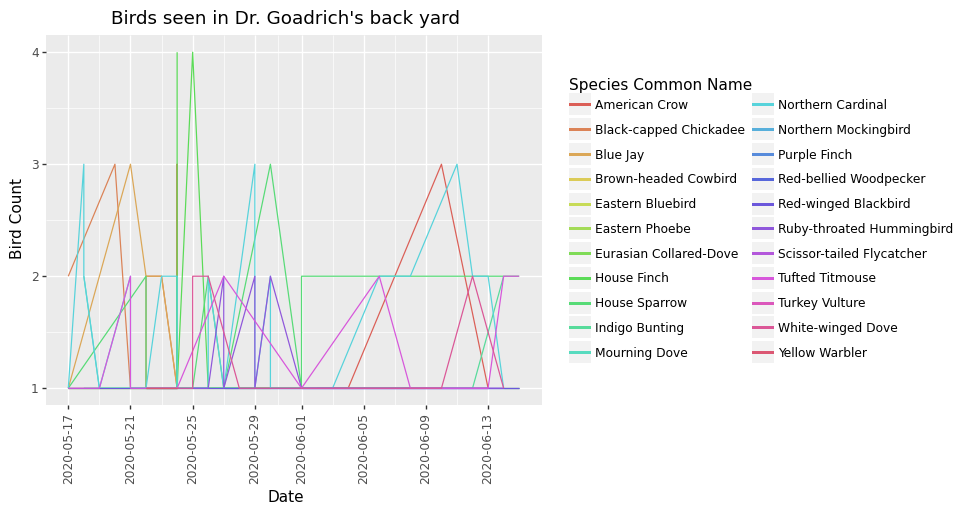

<ggplot: (285376573)>

In [9]:
ggplot(df, aes(x="date", y="count", color="name")) \
+ geom_line() \
+ theme(axis_text_x=element_text(rotation=90)) \
+ labs(title ="Birds seen in Dr. Goadrich's back yard",
      x = "Date", 
      y = "Bird Count",
      color = "Species Common Name")

But, this graph is kind of a mess, mixing up the bird types, the date, and count all at once. 

### Number of birds over time

First, let's aggregate a smaller data frame, using the date and count. We just want to know how many birds we saw each day, irrespective of type.

In [10]:
date_count = df[["date", "count"]].groupby("date", as_index=False).sum()

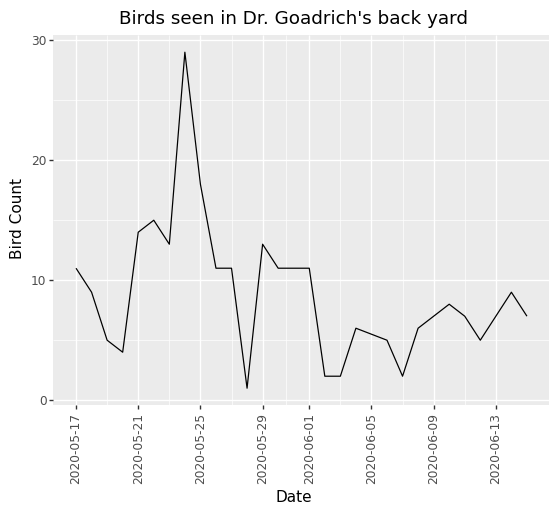

<ggplot: (285376639)>

In [11]:
ggplot(date_count, aes(x="date", y="count")) \
+ geom_line() \
+ theme(axis_text_x=element_text(rotation=90)) \
+ labs(title ="Birds seen in Dr. Goadrich's back yard",
      x = "Date", 
      y = "Bird Count")

*So* much better! 

### Number of birds per type

Next, let's look at the types of birds and how many of each type I saw. For this, the x axis won't be linear, but categorical. If we want to control the ordering instead of using the default alphabetic ordering, we need to be explicit about making the column Categorical.

In [12]:
name_count = df[["name", "count"]].groupby("name", as_index=False).sum().sort_values(by="count", ascending=False)

In [13]:
name_count["name"] = pd.Categorical(name_count["name"], categories=name_count["name"].tolist())

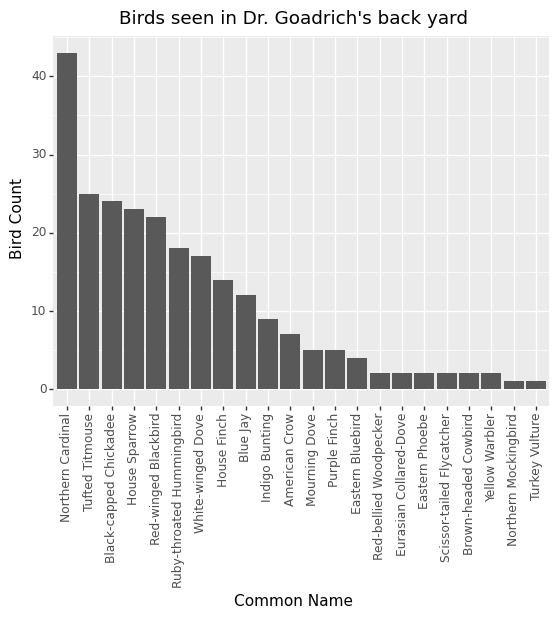

<ggplot: (311541932)>

In [14]:
ggplot(name_count, aes(x="name", y="count")) \
+ geom_col() \
+ theme(axis_text_x=element_text(rotation=90)) \
+ labs(title ="Birds seen in Dr. Goadrich's back yard",
      x = "Common Name", 
      y = "Bird Count")

*Nice!* By controlling the categories based on the sorted data frame, I can easily see that the **Northern Cardinal** is the most frequently seen bird in our back yard.